##Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.cm import get_cmap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
data = pd.read_csv('Credit Card Customer Data.csv')

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


##Exploratory Data Analysis

###Data Summarization

In [ ]:
data.shape

(660, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
data.drop(['Sl_No', 'Customer Key'], axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


###Data Profiling

In [ ]:
data.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


In [ ]:
data['Total_Credit_Cards'].value_counts()

,count
Total_Credit_Cards,
4,151
6,116
7,94
5,73
2,64
1,59
3,52
8,1


In [10]:
data[data.duplicated(subset='Customer Key', keep=False)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [11]:
data = data[~data.duplicated(subset='Customer Key', keep=False)]

###Data Visualisation

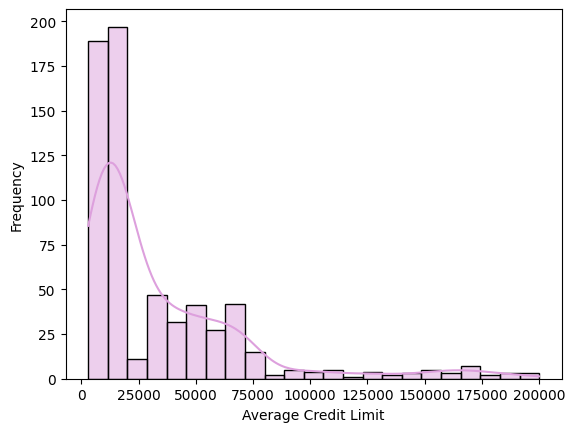

In [14]:
sns.histplot(data['Avg_Credit_Limit'], color='plum', kde=True)
plt.xlabel('Average Credit Limit')
plt.ylabel('Frequency')
plt.show()

Does average card limit affects the number of credit cards a person has?

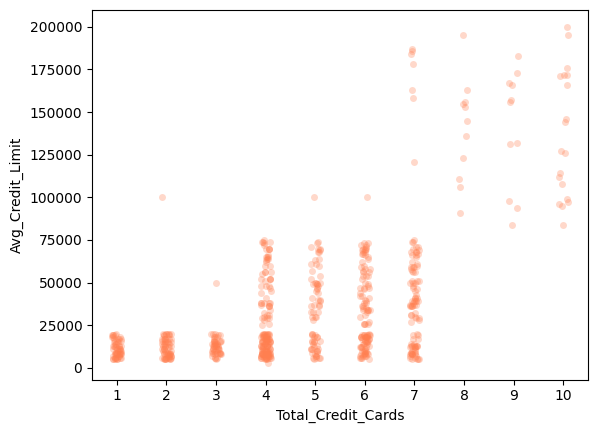

In [ ]:
sns.stripplot(x ='Total_Credit_Cards', y ='Avg_Credit_Limit', data = data, jitter = True, dodge = True, color=to_rgba('coral', 0.3))
plt.show()

How many credit cards do most people have?

<ipython-input-94-3055e537b008>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("Pastel1", 10)


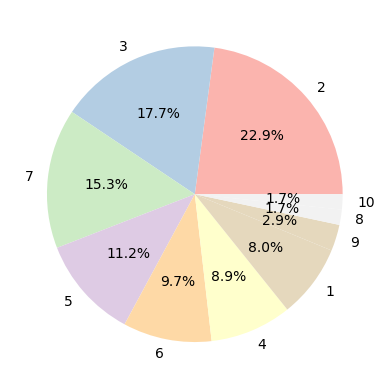

In [ ]:
cmap = get_cmap("Pastel1", 10)
cols = [cmap(i) for i in range(10)]
plt.pie(data['Total_Credit_Cards'].value_counts(), labels=data['Total_Credit_Cards'].unique(), autopct='%1.1f%%', colors = cols)
plt.show()

Is there a relationship between bank visits and calls / online visits?

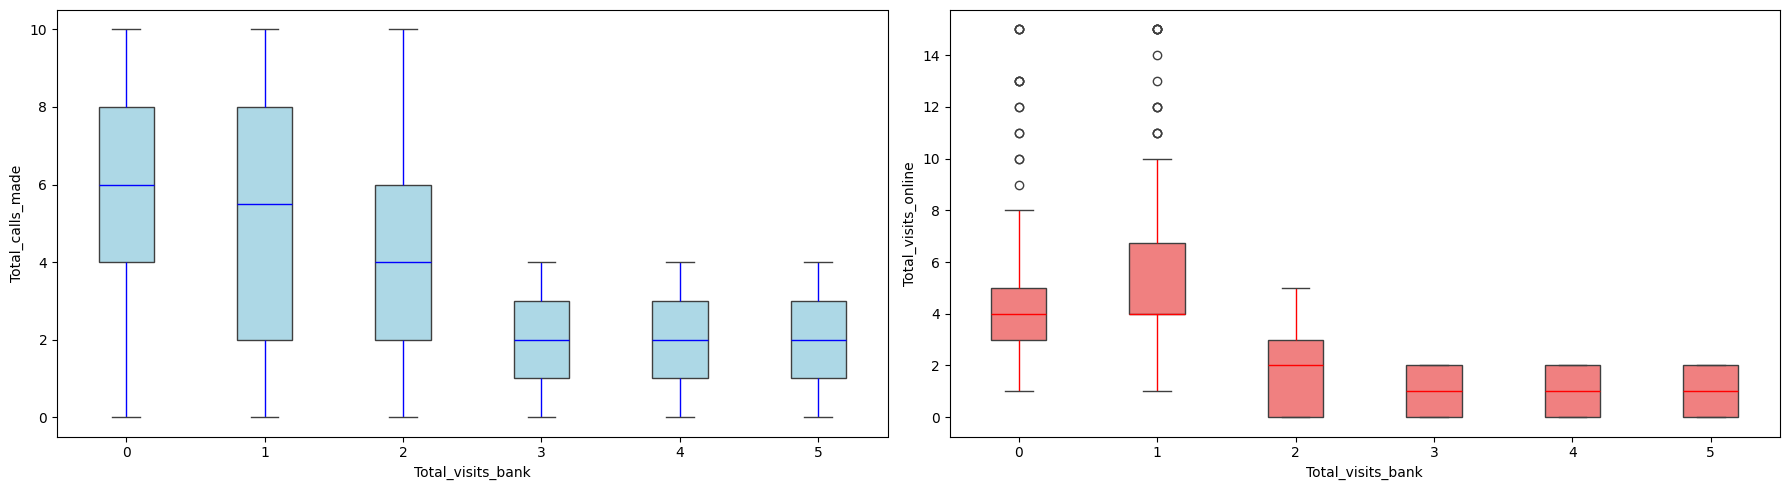

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True)
sns.boxplot(ax = axes[0], x ='Total_visits_bank', y ='Total_calls_made', data = data, width=0.4, boxprops={'facecolor': 'lightblue'},
            showcaps=True, whiskerprops={'color': 'blue'}, medianprops={'color': 'blue'})
sns.boxplot(ax = axes[1], x ='Total_visits_bank', y ='Total_visits_online', data = data,  width=0.4, boxprops={'facecolor': 'lightcoral'},
            showcaps=True, whiskerprops={'color': 'red'}, medianprops={'color': 'red'})
plt.tight_layout()
plt.show()

What kind of communication do people with high and low credit limit prefer?

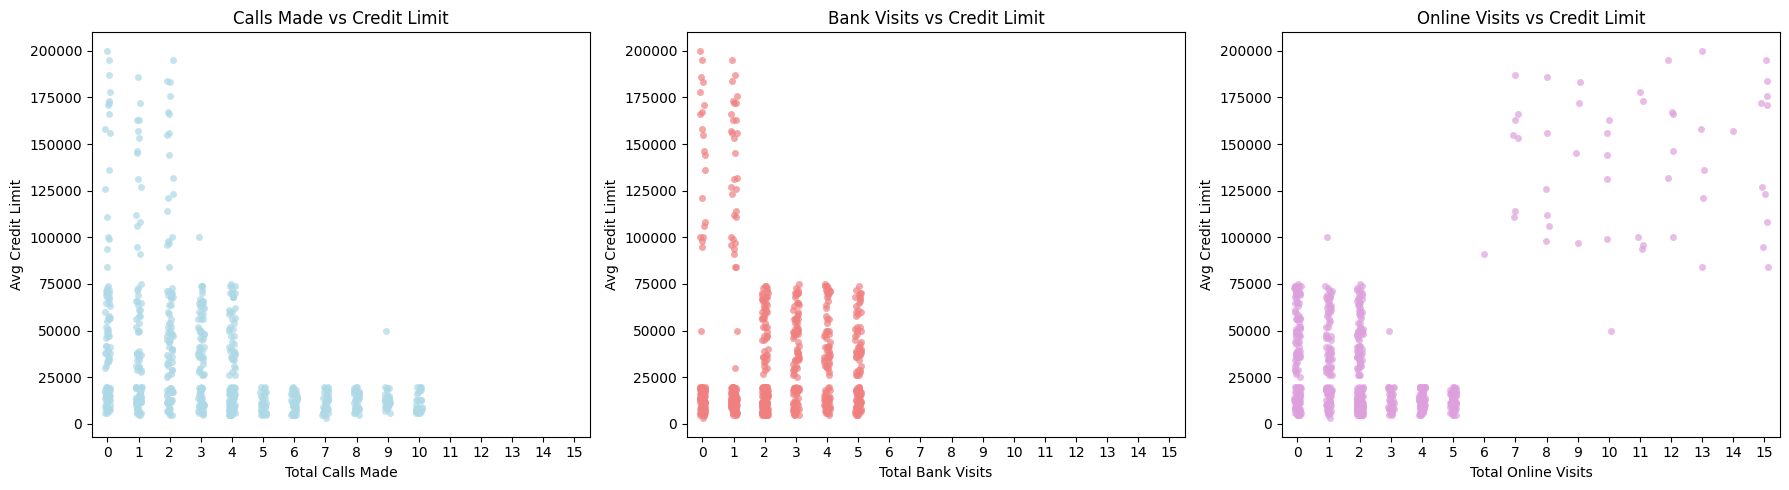

In [ ]:
#Credit vs visits
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
# Plot each trend
sns.stripplot(ax=axes[0], x=data['Total_calls_made'], y =data['Avg_Credit_Limit'], jitter = True, dodge = True, color = to_rgba('lightblue', 0.7))
axes[0].set_title('Calls Made vs Credit Limit')
axes[0].set_xlabel('Total Calls Made')

sns.stripplot(ax=axes[1], x=data['Total_visits_bank'], y =data['Avg_Credit_Limit'], jitter = True, dodge = True, color = to_rgba('lightcoral', 0.7))
axes[1].set_title('Bank Visits vs Credit Limit')
axes[1].set_xlabel('Total Bank Visits')

sns.stripplot(ax=axes[2], x=data['Total_visits_online'], y =data['Avg_Credit_Limit'], jitter = True, dodge = True, color = to_rgba('plum', 0.7))
axes[2].set_title('Online Visits vs Credit Limit')
axes[2].set_xlabel('Total Online Visits')

# Shared X-label
for ax in axes:
    ax.set_ylabel('Avg Credit Limit')

# Adjust layout for better display
plt.tight_layout()
plt.show()

What kind of communication do people with few or many credit cards prefer?

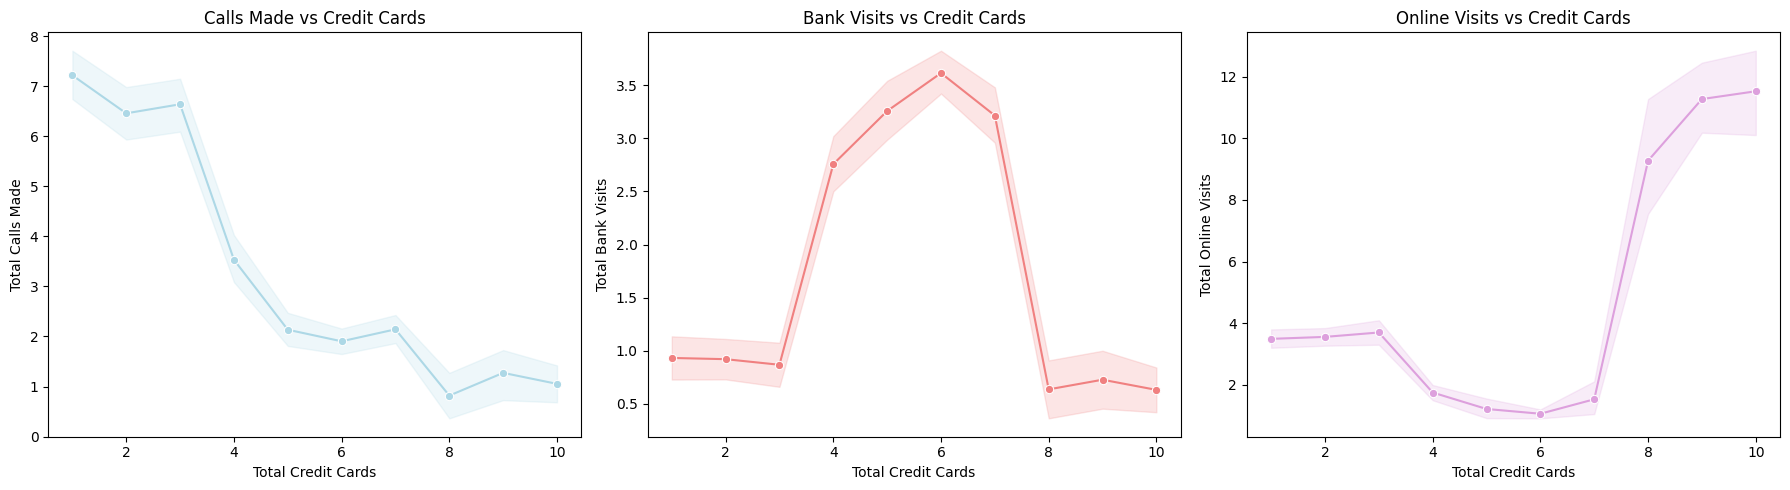

In [16]:
#Bank cards vs visits
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
# Plot each trend
sns.lineplot(ax=axes[0], x=data['Total_Credit_Cards'], y=data['Total_calls_made'], marker='o', color = 'lightblue')
axes[0].set_title('Calls Made vs Credit Cards')
axes[0].set_ylabel('Total Calls Made')

sns.lineplot(ax=axes[1], x=data['Total_Credit_Cards'], y=data['Total_visits_bank'], marker='o', color='lightcoral')
axes[1].set_title('Bank Visits vs Credit Cards')
axes[1].set_ylabel('Total Bank Visits')

sns.lineplot(ax=axes[2], x=data['Total_Credit_Cards'], y=data['Total_visits_online'], marker='o', color='plum')
axes[2].set_title('Online Visits vs Credit Cards')
axes[2].set_ylabel('Total Online Visits')

# Shared X-label
for ax in axes:
    ax.set_xlabel('Total Credit Cards')

# Adjust layout for better display
plt.tight_layout()
plt.show()

##Data Preprocessing

###Handle Outliers

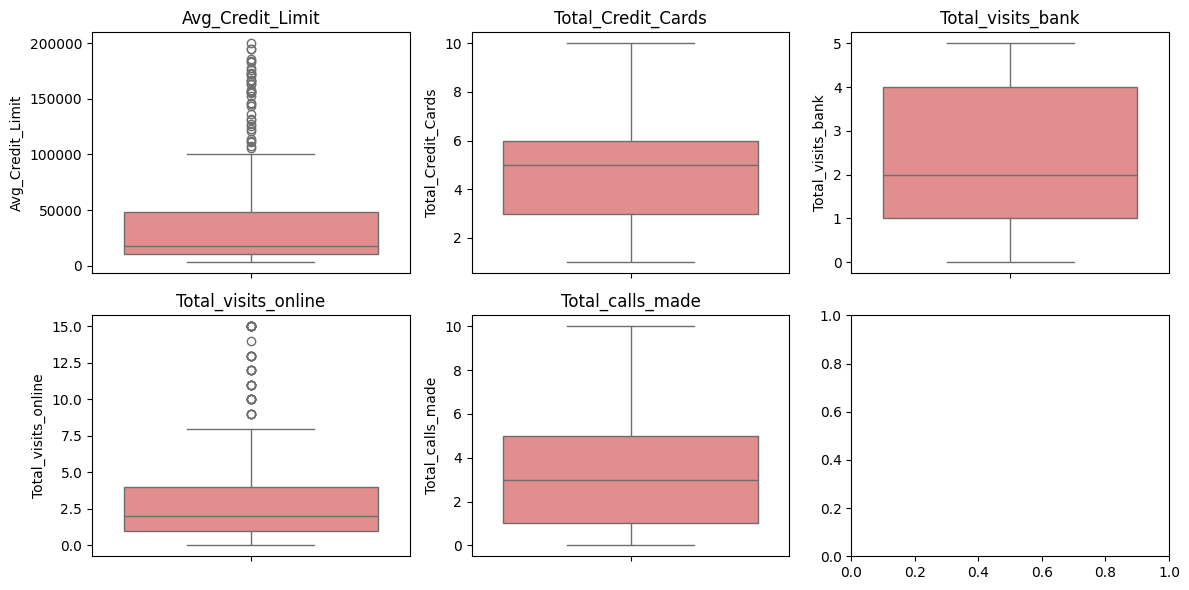

In [17]:
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

fig, axes = plt.subplots(nrows =2, ncols =3, figsize= (12, 6))
axes = axes.flatten()
for i, column in enumerate(cols):
    sns.boxplot(data[column], ax=axes[i], color='lightcoral')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


In [18]:
outliers = ['Avg_Credit_Limit', 'Total_visits_online']
for i in outliers:
  Q1 = data[i].quantile(0.25)  # First quartile
  Q3 = data[i].quantile(0.75)  # Third quartile
  IQR = Q3 - Q1          # Interquartile range

  # Define outlier thresholds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter out outliers
  data = data[~((data[i] < lower_bound) | (data[i] > upper_bound))]

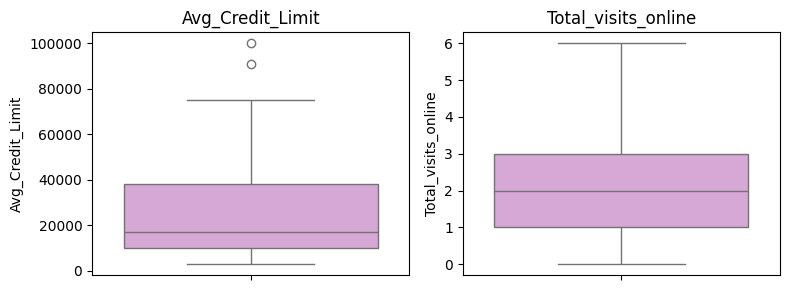

In [22]:
cols = ['Avg_Credit_Limit', 'Total_visits_online']

fig, axes = plt.subplots(nrows =1, ncols =2, figsize= (8, 3))
axes = axes.flatten()
for i, column in enumerate(cols):
    sns.boxplot(data[column], ax=axes[i], color='plum')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [23]:
#Summary statistics
def summary_stats(col):
  print("Average : " + str(data[col].mean()))
  print("Median : " + str(data[col].median()))
  print("Range : " + str(data[col].max() - data[col].min()))

In [24]:
# Avg_Credit_Limit
summary_stats('Avg_Credit_Limit')

Average : 25789.0365448505
Median : 17000.0
Range : 97000


In [25]:
# Total_Credit_Cards
summary_stats('Total_Credit_Cards')

Average : 4.3754152823920265
Median : 4.0
Range : 7


###Data Splitting

In [26]:
# Scaling and fitting data
X = data.drop(['Sl_No', 'Customer Key'], axis=1).reset_index()
X_scaled = StandardScaler().fit_transform(X)

##Machine Learning - KMeans

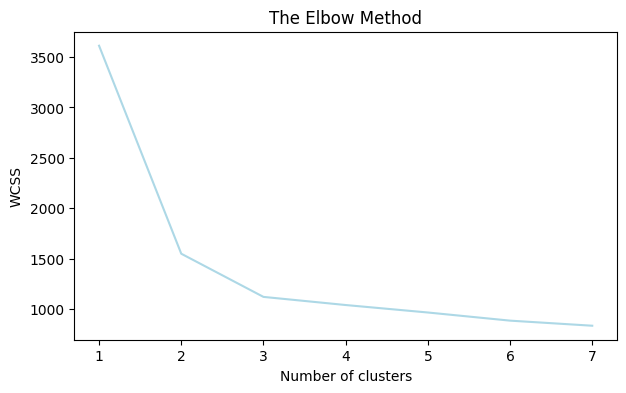

In [29]:
#Finding optimal number of clusters
wcss = []
for i in range(1,8):
  kmeans = KMeans(i, random_state = 0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1,8), wcss, c='lightblue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

=> 3 optimal clusters

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

Add the cluster labels to the data frame:

In [31]:
data['Cluster'] = kmeans.labels_

In [34]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
5,6,58634,20000,3,0,1,8,0
7,8,37376,15000,3,0,1,1,0


In [36]:
data.groupby('Cluster').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,,,
0,116.833333,54891.000000,12283.783784,2.427928,0.936937,3.531532,6.828829
1,505.100962,56781.596154,51014.423077,5.548077,3.403846,0.966346,2.024038
2,317.017442,52490.220930,12715.116279,5.470930,3.593023,1.023256,1.976744


In [39]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

Graph the kmean clusters:

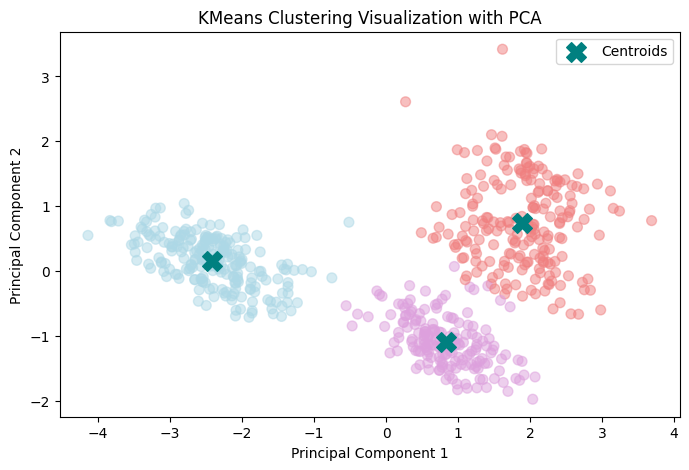

In [53]:
plt.figure(figsize=(8, 5))
colors = np.array(['lightblue', 'lightcoral', 'plum'])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[kmeans.labels_], s=50, alpha=0.5)

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='teal', marker='X', s=200, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Visualization with PCA')
plt.legend()
plt.show()

In [41]:
# Printing the principal components
print("Principal Component 1 (PC1):")
print(pca.components_[0])

print("\nPrincipal Component 2 (PC2):")
print(pca.components_[1])

Principal Component 1 (PC1):
[ 0.45343517  0.32906274  0.41945493  0.4000014  -0.41272952 -0.42405783]

Principal Component 2 (PC2):
[ 0.27962241  0.81501355 -0.1691256  -0.38009219  0.20149947  0.20949614]


In [ ]:
# Display in a dataframe for better understanding
pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])

,index,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
PC1,0.454000,0.329270,0.419121,0.400180,-0.411527,-0.424623
PC2,0.277821,0.815411,-0.160476,-0.379666,0.208472,0.211096
